In [1]:
from bioinfokit.analys import stat, get_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
df = pd.read_csv("50_startups.csv")
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [3]:
X = df.iloc[:,[0,1,2,3,4]].values
y = df.iloc[:,4].values

In [4]:
print(X)
print(y)

[[165349.2 136897.8 471784.1 'New York' 192261.83]
 [162597.7 151377.59 443898.53 'California' 191792.06]
 [153441.51 101145.55 407934.54 'Florida' 191050.39]
 [144372.41 118671.85 383199.62 'New York' 182901.99]
 [142107.34 91391.77 366168.42 'Florida' 166187.94]
 [131876.9 99814.71 362861.36 'New York' 156991.12]
 [134615.46 147198.87 127716.82 'California' 156122.51]
 [130298.13 145530.06 323876.68 'Florida' 155752.6]
 [120542.52 148718.95 311613.29 'New York' 152211.77]
 [123334.88 108679.17 304981.62 'California' 149759.96]
 [101913.08 110594.11 229160.95 'Florida' 146121.95]
 [100671.96 91790.61 249744.55 'California' 144259.4]
 [93863.75 127320.38 249839.44 'Florida' 141585.52]
 [91992.39 135495.07 252664.93 'California' 134307.35]
 [119943.24 156547.42 256512.92 'Florida' 132602.65]
 [114523.61 122616.84 261776.23 'New York' 129917.04]
 [78013.11 121597.55 264346.06 'California' 126992.93]
 [94657.16 145077.58 282574.31 'New York' 125370.37]
 [91749.16 114175.79 294919.57 'Flor

In [5]:
# Encoding categorical variable

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3]) # X["state"]
X

array([[165349.2, 136897.8, 471784.1, 2, 192261.83],
       [162597.7, 151377.59, 443898.53, 0, 191792.06],
       [153441.51, 101145.55, 407934.54, 1, 191050.39],
       [144372.41, 118671.85, 383199.62, 2, 182901.99],
       [142107.34, 91391.77, 366168.42, 1, 166187.94],
       [131876.9, 99814.71, 362861.36, 2, 156991.12],
       [134615.46, 147198.87, 127716.82, 0, 156122.51],
       [130298.13, 145530.06, 323876.68, 1, 155752.6],
       [120542.52, 148718.95, 311613.29, 2, 152211.77],
       [123334.88, 108679.17, 304981.62, 0, 149759.96],
       [101913.08, 110594.11, 229160.95, 1, 146121.95],
       [100671.96, 91790.61, 249744.55, 0, 144259.4],
       [93863.75, 127320.38, 249839.44, 1, 141585.52],
       [91992.39, 135495.07, 252664.93, 0, 134307.35],
       [119943.24, 156547.42, 256512.92, 1, 132602.65],
       [114523.61, 122616.84, 261776.23, 2, 129917.04],
       [78013.11, 121597.55, 264346.06, 0, 126992.93],
       [94657.16, 145077.58, 282574.31, 2, 125370.37],
      

In [6]:
#Using OneHotEncoder

# ohe = OneHotEncoder()

# X1 = ohe.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = \
train_test_split(X,y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(35, 5)
(15, 5)


In [8]:
#fit multiple linear regression test
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor

LinearRegression()

In [9]:
# Predcitng the test results

y_pred = regressor.predict(X_test)
y_pred[:5]

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37])

In [10]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

# accuracy = (y_test,y_pred)
# accuracy
mae = mean_absolute_error(y_test,y_pred)
print("The Mean Absolute Error is: ", mae)
mse = mean_squared_error(y_test,y_pred)
print("The Mean Squared Error is: ", mse)


The Mean Absolute Error is:  2.7648638933897017e-11
The Mean Squared Error is:  1.3587820195537735e-21


In [11]:
y_test

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86, 141585.52, 166187.94,
        89949.14, 152211.77, 182901.99])

In [12]:
y_pred

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86, 141585.52, 166187.94,
        89949.14, 152211.77, 182901.99])

In [13]:
regressor.coef_

array([-1.50080220e-15,  3.80213357e-16, -1.71549833e-16,  2.49060909e-12,
        1.00000000e+00])

In [14]:
regressor.intercept_

-4.3655745685100555e-11

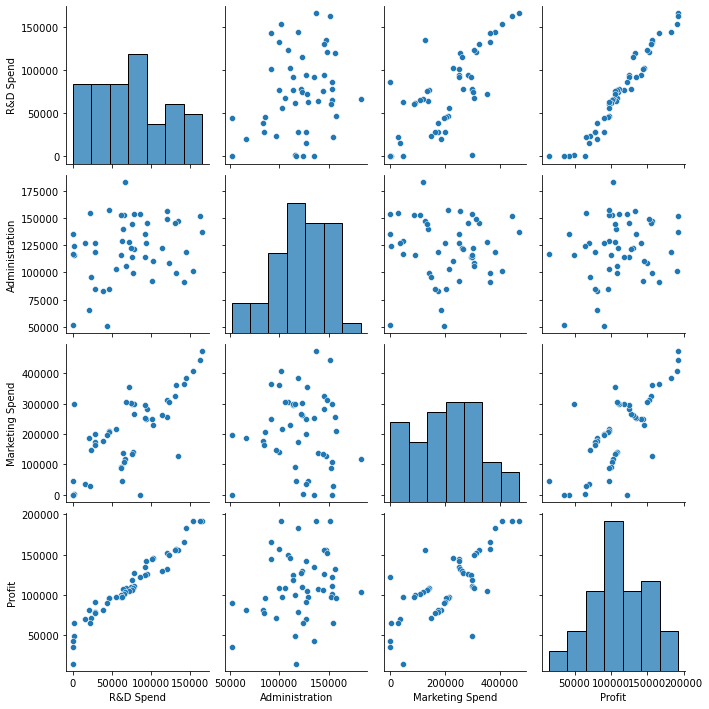

In [16]:
sns.pairplot(df)

In [17]:
df.corr()

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000